# Configurações de Experimentação

Este arquivo foi criado por Leonardo Monteiro Neres de Lima

## Descrição da atividade

Executar 100 repetições do algoritmo desenvolvido na Parte 1 para as seguintes configurações η × I = {0,4, 0,1, 0,01} × {(−100, + 100),(−1, + 1),(−0,5, + 0,5)}.


## Inportações

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import perceptron
import math
import random
import os

### Configurações a serem consideradas

In [2]:
# Teta
teta = 1
#vies
vies = -1

# taxa de aprendizado
n = [.4, .1, .01]

# modulo para gerar o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos
intervalo = [100, 1, .5]

### Produto cartesiano para gerar uma lista de Configurações

In [3]:
index = pd.MultiIndex.from_product([n, intervalo], names = ["n", "intervalo"])

config = pd.DataFrame(index = index).reset_index()

### Funções para capturar e imprimir as configurações

In [4]:
# retorna uma lista com os parametros da configuração
def get_conf(n, i):
    return [n, -i, i]
    
# imprime a configuração
def print_conf(n, i_i, i_s):
    print('Taxa de aprendizado: '+ str(n)+'\nIntervalo a ser utilizado para a distribuição uniforme do valor dos pesos: ('+ str(i_i) +', '+ str(i_s) +')')

## Leitura e configuração do Dataset

In [5]:
# leitura do dataset
data = np.fromfile(os.path.join('datasets', 'dataAll.txt'), dtype=float)
print(data.shape)


# Função para configurar entrada e saída para o treinamento do perceptron
def get_entradas_e_saidas(data):
    i = 0
    entradas = []
    saidas = []
    while(i < len(data)):
        entradas.append([vies, data[i], data[i+1]])
        saidas.append(data[i+2])
        i = i + 3
    return np.array(entradas), np.array(saidas)

entradas, saidas = get_entradas_e_saidas(data)

(3000,)


## Funções Auxiliares

 Para o cumprimento da atividade é necessário uma distribuição uniforme de valores aleatórios para inicialização dos pesos para a execução do treinamento, a exibição de um gráfico para ilustrar as classes do dataset e o aprendizado representado por uma reta, e também a média e desvio padrão de quantidade ajustes e épocas das 100 execuções de treinamento de cada configuração de treinamento.

In [6]:
# geração de um número aleatório dentro de um intervalo
def random_interval(i, s):
    min = i
    max = s
    return min + (random() * (max - min))

# geração de uma lista de pesos segundo uma distribuição uniforme de valores aleatórios dado o intervalo
def get_pesos(i, s):
    # seed(1)
    return np.random.uniform(i, s, entradas.shape[1])


In [7]:
# acumulador de quandidate em lista de lista para lista
def accumulator(l):
    list_accumulator = []
    for i in l:
        x = 0
        for j in i:
            x = x + j
        list_accumulator.append(x)
    return list_accumulator

# execução de n execuções de treinamento e impressão da média e desvio padrão de quantidade ajustes e épocas
def executions_conf(interval_i, interval_s, n, n_executions, teta):
    v_pesos = []
    v_epocas = []
    v_ajustes = []
    for i in range(n_executions):
        init_pesos = get_pesos(interval_i, interval_s)
        pesos, epocas, ajustes = perceptron.treinamento(entradas, saidas, init_pesos, n, teta)
        v_pesos.append(pesos)
        v_epocas.append(epocas)
        v_ajustes.append(ajustes)
    pesos = np.array(v_pesos)
    epocas = np.array(v_epocas)
    ajustes = np.array(accumulator(v_ajustes))
    print(str(n_executions)+' execucoes para a configuracao')
    print('-'*30+'Quantidade de Ajustes de Pesos'+30*'-')
    print('Media: ' + str(np.average(ajustes)))
    print('Desvio Padrao: ' + str(np.std(ajustes)))
    print('-'*35+'Quantidade de Epocas'+35*'-')
    print('Media: ' + str(np.average(epocas)))
    print('Desvio Padrao: ' + str(np.std(epocas)))



In [8]:
# exibição de um gráfico para ilustrar as classes do dataset e o aprendizado representado por uma reta
def gera_grafico(entradas, saidas, interval_i, interval_s, n, teta):
    # declaracao dos vetores para o grafico
    class_1_x = []
    class_1_y = []
    class_2_x = []
    class_2_y = []
    # separacao de classes por cor
    for i in range(len(entradas)):
        if (saidas[i]==1):
            class_1_x.append(entradas[i][1])
            class_1_y.append(entradas[i][2])
        else:
            class_2_x.append(entradas[i][1])
            class_2_y.append(entradas[i][2])

    # treinamento
    init_pesos = get_pesos(interval_i, interval_s)
    pesos, epocas, ajustes = perceptron.treinamento(entradas, saidas, init_pesos, n, teta)
    
    # Cálculo dos coeficientes da linha de decisão
    b = pesos[0]/pesos[2]
    a = -1 * (pesos[1]/pesos[2])
    # Criando os pontos da linha de decisão
    x, y = [], []
    menor = int(math.ceil(min(entradas[:,1])))
    maior = int(math.ceil(max(entradas[:,1])))
    for i in range(menor, maior, 1):
        x.append(i)
        valor = b + a*(i)
        y.append(valor)

    
    plt.rcParams['figure.figsize']=(11,11)
    plt.scatter(class_1_x, class_1_y, color='red')
    plt.plot(x, y, color="black", markersize=100)
    plt.scatter(class_2_x, class_2_y, color='blue')
    plt.show()

## Função de iteração da lista de configurações 

A chamada da exibição de um gráfico e 100 execuções de treinamento de cada configuração.


______________________________________Configuração 1______________________________________

Taxa de aprendizado: 0.4
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-100.0, 100.0)



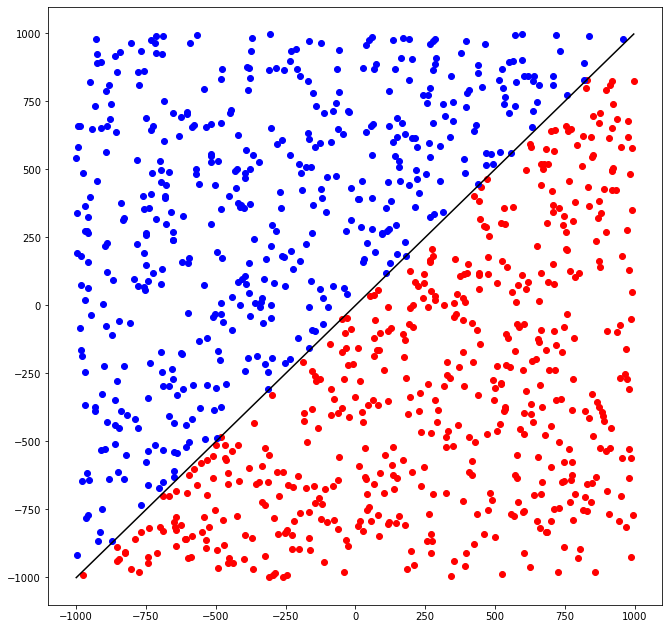


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 299.19
Desvio Padrao: 196.99511136066297
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 7.46
Desvio Padrao: 6.403780133639817


______________________________________Configuração 2______________________________________

Taxa de aprendizado: 0.4
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-1.0, 1.0)



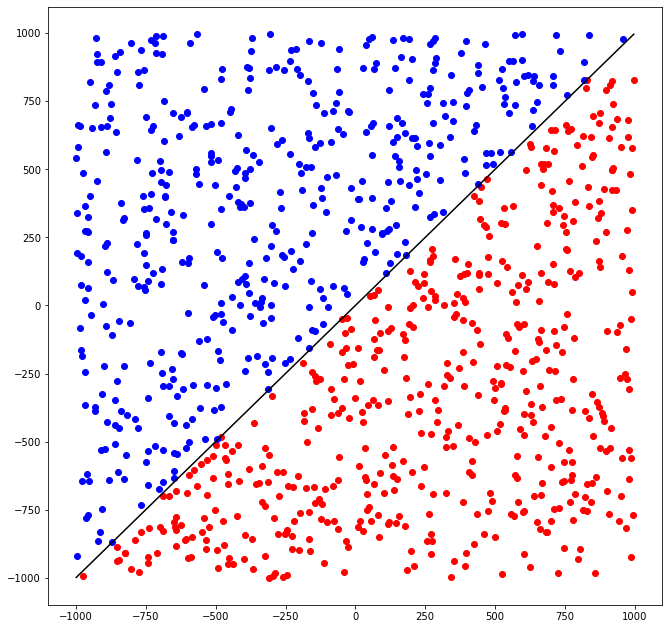


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 168.87
Desvio Padrao: 136.77979785041356
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 4.79
Desvio Padrao: 3.1441851090544906


______________________________________Configuração 3______________________________________

Taxa de aprendizado: 0.4
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-0.5, 0.5)



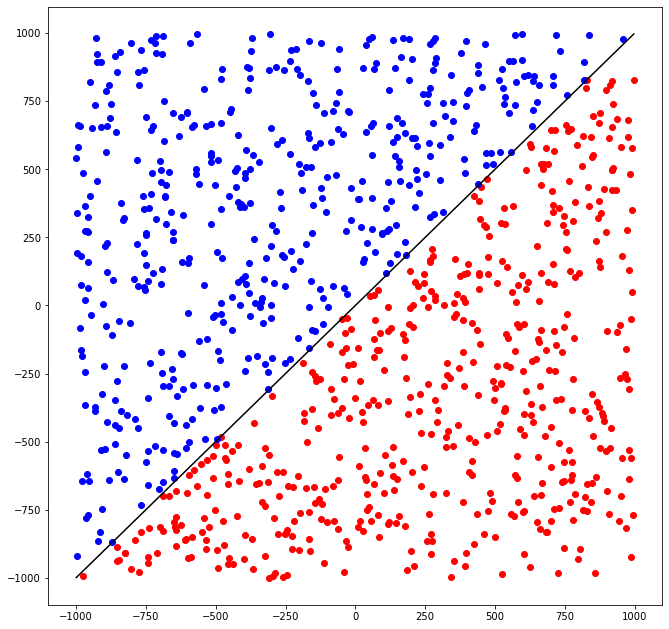


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 149.52
Desvio Padrao: 103.89422313102881
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 4.52
Desvio Padrao: 2.7694042680692177


______________________________________Configuração 4______________________________________

Taxa de aprendizado: 0.1
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-100.0, 100.0)



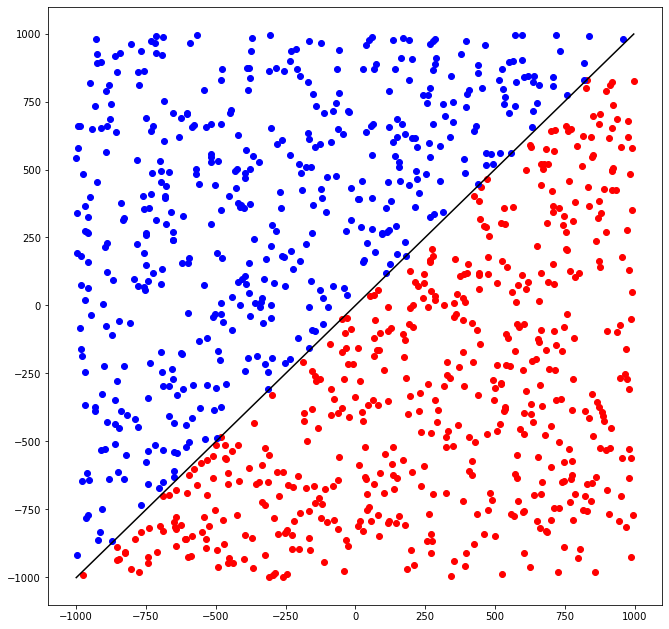


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 350.67
Desvio Padrao: 217.98747922759233
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 9.55
Desvio Padrao: 7.663386979658537


______________________________________Configuração 5______________________________________

Taxa de aprendizado: 0.1
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-1.0, 1.0)



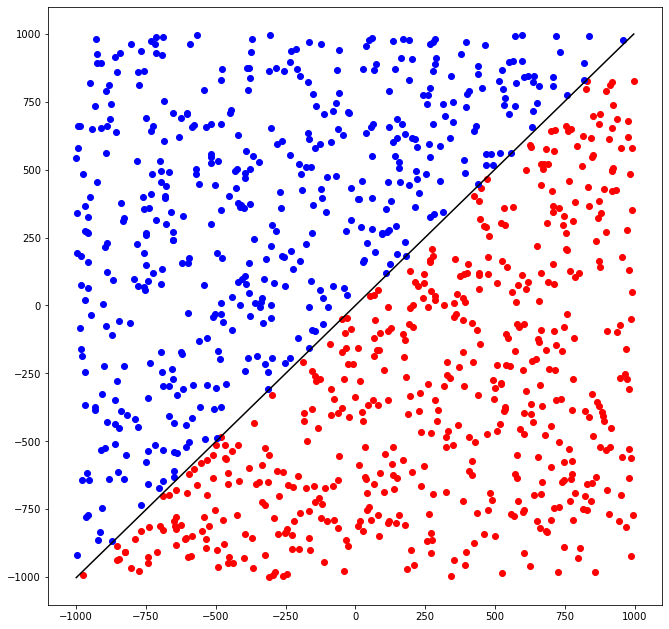


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 227.67
Desvio Padrao: 186.90307942888478
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 5.98
Desvio Padrao: 5.310329556628289


______________________________________Configuração 6______________________________________

Taxa de aprendizado: 0.1
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-0.5, 0.5)



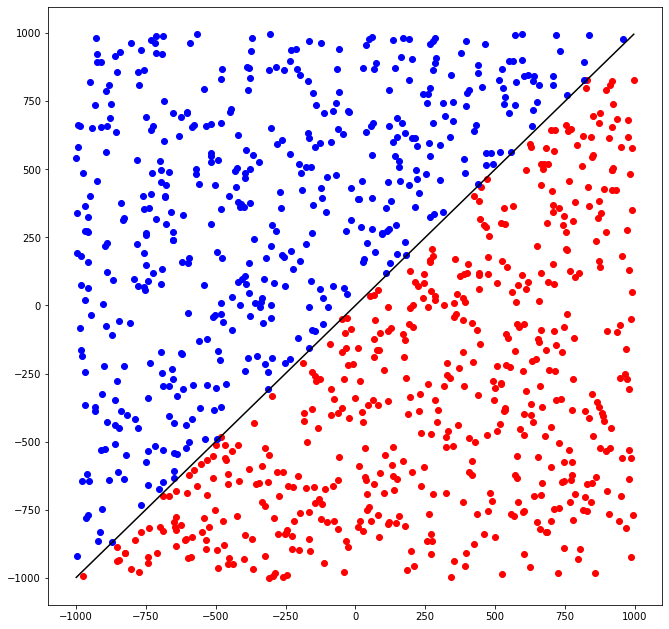


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 208.14
Desvio Padrao: 169.96941018901018
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 5.36
Desvio Padrao: 4.148541912527822


______________________________________Configuração 7______________________________________

Taxa de aprendizado: 0.01
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-100.0, 100.0)



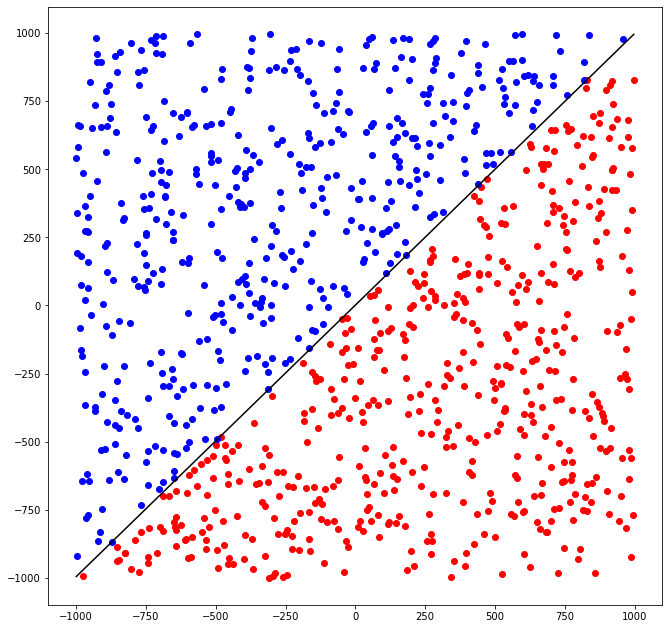


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 451.65
Desvio Padrao: 241.03291787637636
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 11.06
Desvio Padrao: 6.188408519159025


______________________________________Configuração 8______________________________________

Taxa de aprendizado: 0.01
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-1.0, 1.0)



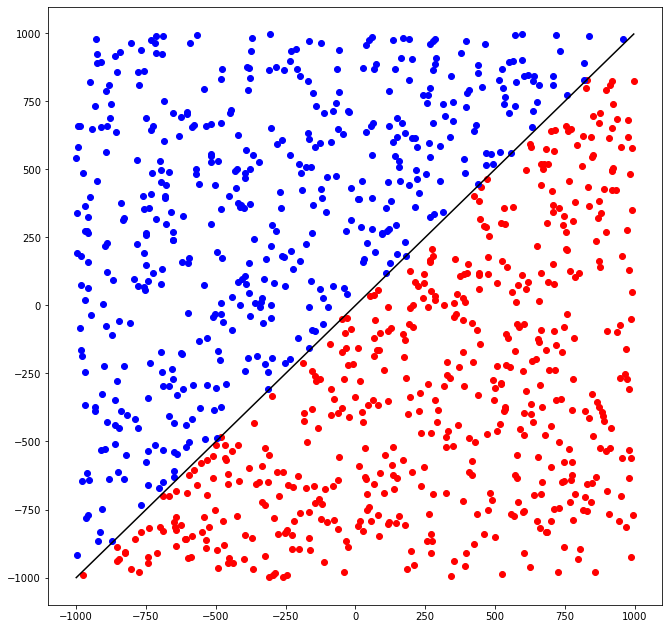


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 267.96
Desvio Padrao: 211.02004264998146
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 7.18
Desvio Padrao: 6.551915750374084


______________________________________Configuração 9______________________________________

Taxa de aprendizado: 0.01
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-0.5, 0.5)



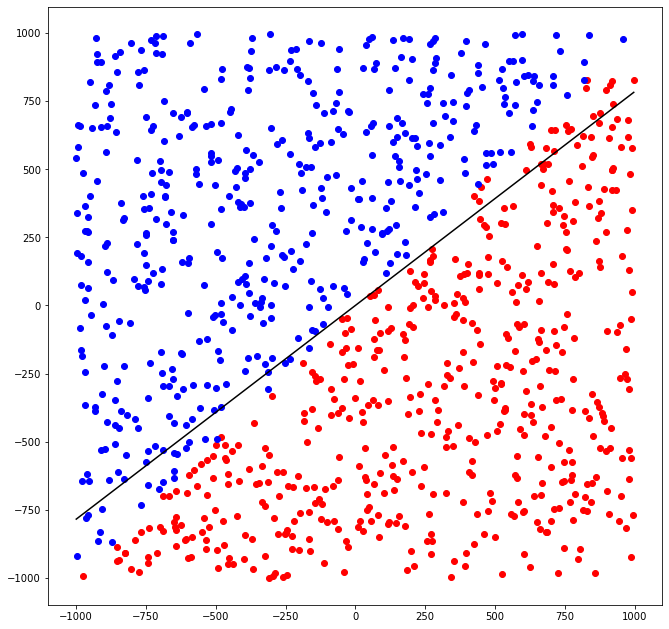


100 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 289.89
Desvio Padrao: 214.38590881865346
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 7.97
Desvio Padrao: 6.777101150196889



In [9]:
# itera pela lista capturando e imprimindo o produto cartesiano de configuracoes
for i in range(len(config['n'])):

    print('\n'+'_'*38+'Configuração ' + str(i+1)+'_'*38+'\n')
    y = get_conf(config['n'][i], config['intervalo'][i])
    print_conf(y[0],y[1],y[2])
    print()

    gera_grafico(entradas, saidas, y[1], y[2], y[0], teta)
    print()

    executions_conf(y[1], y[2], y[0], 100, teta)
    print()
